把数据导入（由于作业用到的Boston Housing Price 数据有触及敏感课题的争议，因此sklearn库弃用了此数据库，导致使用load_boston函数时候会弹出很长的警告。因此可以过滤warnings来提高可读性。）

In [6]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.datasets import load_boston

price_dataset = load_boston()

下方为有关波士顿房价数据的相关叙述。我们的预测目标（target）为MEDV，即房价的中位数（以1000$为单位）。

In [7]:
print(price_dataset.keys())
print(price_dataset.DESCR)

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])
.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highway

下方使用了Pandas生成表格。boston.head()用于导出首5条数据的函数。

In [8]:
import pandas as pd  

boston = pd.DataFrame(price_dataset.data, columns=price_dataset.feature_names)
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


从上可见我们的表格少了目标数据'MEDV',因此将'MEDV'导入表格中：

In [9]:
boston['MEDV'] = price_dataset.target

再度导出表格的首5条数据，可见'MEDV'已被包含在内：

In [10]:
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


X：波士顿房价中除了目标参数（'MEDV')以外的其他参数，
Y：目标参数（'MEDV'）

将数据随机地分成训练集与测试集，训练集占原数据集的80%，而测试集则占20%。

In [11]:
import numpy as np
from sklearn.model_selection import train_test_split

X = boston.drop('MEDV' , axis = 1)
Y = boston['MEDV']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=5)

首先训练Ridge模型。

导入模型后定义函数ridge_regression()，以便取各种alpha值进行训练，来找到最优的alpha。此函数每次取alpha对训练集训练完毕后，将用ridge_model.score()计算R平方得分，并把结果记录在ridge_alpha_acc_results[]中.

此处的ridge模型中设置了normalize=True，即把X中的所有参数都标准化处理。经过这样的预处理，最后的R2得分一般会比较高。

In [12]:
from sklearn.linear_model import Ridge

In [13]:
def ridge_regression(alpha, ridge_alpha_acc_results):
    ridge_model = Ridge(alpha=alpha,normalize=True)
    ridge_model.fit(X_train , Y_train)
    
    ridge_score = ridge_model.score(X_test , Y_test)
    ridge_alpha_acc_results.append(ridge_score*100)

生成一个记录着我们想取来训练的alpha值的list（下方使用了np.linspace()，括弧里的(1e-4,1,500)的意思是在[1e-4,1]之间生成500个等距的值），接着对list里面的所有alpha值进行训练。

对所有alpha值训练完毕后，将每个alpha值和它们所对应的训练结果对应起来，接着导出最优alpha值以及其所对应的R2得分。

In [14]:
ridge_alpha_list=np.linspace(1e-4,1,500)
ridge_alpha_acc_results=[]
for i in ridge_alpha_list:
    ridge_regression(i, ridge_alpha_acc_results)
ridge_results=dict(zip(ridge_alpha_list,ridge_alpha_acc_results))
print("Ridge optimal alpha:",max(ridge_results,key=ridge_results.get),", accuracy:",max(ridge_results.values()))

Ridge optimal alpha: 0.16240841683366733 , accuracy: 74.99740529685197


从上可知使用Ridge模型进行房价预测训练时候，alpha取0.16240841683366733将得到最准确的房价预测结果。

此外，将每个alpha值与它们对应的R2得分进行作图，可得出以下曲线：

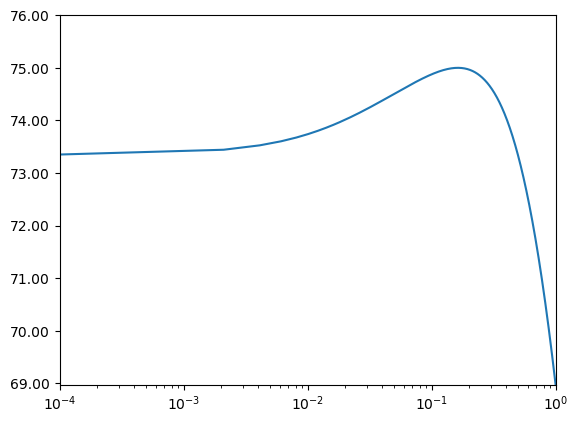

In [23]:
import matplotlib.pyplot as plt
import matplotlib.ticker

x=np.array(ridge_alpha_list)
y=np.array(ridge_alpha_acc_results)
fig,ridgeplt=plt.subplots()
ridgeplt.yaxis.set_major_formatter(matplotlib.ticker.FormatStrFormatter('%.2f'))
plt.plot(x,y)
plt.xscale('log')
plt.xlim(1e-4,1)
plt.ylim(min(ridge_alpha_acc_results),76)
plt.show()

从上可见R2得分会起初会随着alpha的增大逐渐上升，直到到达最优alpha值得到最大的R2得分，但接着R2得分会随着alpha的继续增大而急骤下降。

下方训练Lasso模型（过程和Ridge模型的训练相似）：

导入模型后定义函数lasso_regression()，以便取各种alpha值进行训练，来找到最优的alpha。
此函数每次取alpha对训练集训练完毕后，将用lasso_model.score()计算R平方得分，并把结果记录在lasso_alpha_acc_results[]中.

此处的Lasso模型中设置了normalize=True，即把X中的所有参数都标准化处理。经过这样的预处理，最后的R2得分一般会比较高。

In [24]:
from sklearn.linear_model import Lasso

In [25]:
def lasso_regression(alpha, alpha_acc_results):
    lasso_model = Lasso(alpha=alpha,normalize=True)
    lasso_model.fit(X_train,Y_train)
    
    lasso_score = lasso_model.score(X_test , Y_test)
    lasso_alpha_acc_results.append(lasso_score*100)

生成一个记录着我们想取来训练的alpha值的list（下方使用了np.linspace()，括弧里的(1e-5,0.1,500)的意思是在[1e-5,0.1]之间生成500个等距的值），接着对list里面的所有alpha值进行训练。

对所有alpha值训练完毕后，将每个alpha值和它们所对应的训练结果对应起来，接着导出最优alpha值以及其所对应的R2得分。

In [26]:
lasso_alpha_list=np.linspace(1e-5,0.1,500)
lasso_alpha_acc_results=[]
for i in lasso_alpha_list:
    lasso_regression(i, lasso_alpha_acc_results)
lasso_results=dict(zip(lasso_alpha_list,lasso_alpha_acc_results))
print("Lasso optimal alpha:",max(lasso_results,key=lasso_results.get),", accuracy:",max(lasso_results.values()))

Lasso optimal alpha: 0.0052198997995991986 , accuracy: 74.27998177847816


从上可知使用Lasso模型进行房价预测训练时候，alpha取0.0052198997995991986将得到最准确的房价预测结果。

和Ridge模型的训练结果相比，Ridge模型R2得分最高可达74.99740529685197，而Lasso模型最高达74.27998177847816，可见Ridge模型比Lasso模型在波士顿房价预测中更胜一筹。

对Lasso模型所训练的每个alpha值与它们对应的R2得分进行作图，可得出以下曲线：

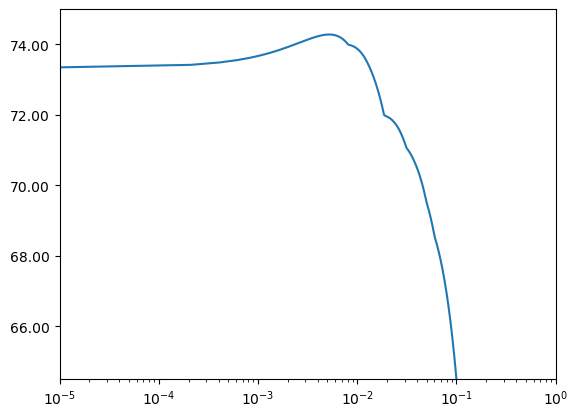

In [27]:
x=np.array(lasso_alpha_list)
y=np.array(lasso_alpha_acc_results)
fig,lassoplt=plt.subplots()
lassoplt.yaxis.set_major_formatter(matplotlib.ticker.FormatStrFormatter('%.2f'))
plt.plot(x,y)
plt.xscale('log')
plt.xlim(1e-5,1)
plt.ylim(min(lasso_alpha_acc_results),75)
plt.show()

和Ridge模型的作图结果类似，从上可见R2得分会起初会随着alpha的增大逐渐上升，直到到达最优alpha值得到最大的R2得分，但接着R2得分会随着alpha的继续增大而急骤下降。